**SOFT DEADLINE:** `20.03.2022 23:59 msk` 

# [5 points] Part 1. Data cleaning

The task is to clear the text data of the crawled web-pages from different sites. 

It is necessary to ensure that the distribution of the 100 most frequent words includes only meaningful words in english language (not particles, conjunctions, prepositions, numbers, tags, symbols).

Determine the order of operations below and carry out the appropriate cleaning.

1. Remove non-english words
1. Remove html-tags (try to do it with regular expression, or play with beautifulsoap library)
1. Apply lemmatization / stemming
1. Remove stop-words
1. Additional processing - At your own initiative, if this helps to obtain a better distribution

The choosen order:
1. Remove html-tags
2. Remove non-english words
3. Remove stop-words
4. Apply lemmatization / stemming
5. Additional processing

#### Hints

1. To do text processing you may use nltk and re libraries
1. and / or any other libraries on your choise

#### Data reading

The dataset for this part can be downloaded here: `https://drive.google.com/file/d/1wLwo83J-ikCCZY2RAoYx8NghaSaQ-lBA/view?usp=sharing`

In [163]:
import pandas as pd

# path = './storage/hw1/train.csv'
path = './storage/hw1/web_sites_data.csv'

In [164]:
limit = 100

data = pd.read_csv(path, nrows=limit)

# for debug
# data = data.sample(100)

data

,text
0,"<html>\n<head profile=""http://www.w3.org/2005/..."
1,"<html>\n<head profile=""http://www.w3.org/2005/..."
2,"<html>\n<head profile=""http://www.w3.org/2005/..."
3,"<html>\n<head profile=""http://www.w3.org/2005/..."
4,"<html>\n<head profile=""http://www.w3.org/2005/..."
...,...
95,"<html>\n<head profile=""http://www.w3.org/2005/..."
96,"<html>\n<head profile=""http://www.w3.org/2005/..."
97,"<html>\n<head profile=""http://www.w3.org/2005/..."
98,"<html>\n<head profile=""http://www.w3.org/2005/..."


In [165]:
ldata = data.values.tolist()
ldata = [i[0] for i in ldata]
ldata[0][:200], ldata[10][:300]

('<html>\n<head profile="http://www.w3.org/2005/10/profile">\n<LINK REL="SHORTCUT ICON" href="http://i.bookmooch.com/favicon.ico"> \n<link rel="icon" type="image/png" href="http://i.bookmooch.com/favicon.p',
 '<html>\n<head profile="http://www.w3.org/2005/10/profile">\n<LINK REL="SHORTCUT ICON" href="http://i.bookmooch.com/favicon.ico"> \n<link rel="icon" type="image/png" href="http://i.bookmooch.com/favicon.png">\n<title>Kevin J.Anderson : The X-Files (3) - Ground Zero</title>\n<meta http-equiv="Content-Type"')

#### Data processing

In [166]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import TreebankWordTokenizer, WhitespaceTokenizer
import re
# nltk.download('words')
# nltk.download('stopwords')
# nltk.download("wordnet")
# nltk.download('omw-1.4') 
# nltk.download('punkt') 

In [167]:
# 1. Remove html-tags
html_reg = """<("[^"]*"|'[^']*'|[^'">])*>"""
other_reg = ""

tldata = []
for item in ldata:

    nitem = item
    nitem = re.sub(html_reg, "", nitem)
    nitem = re.sub("\t", "", nitem)
    nitem = re.sub("\r", "", nitem)
    nitem = re.sub("\n", "", nitem)
    nitem = re.sub("&nbsp;", "", nitem)

    tldata.append(nitem)
    
    continue

ldata = tldata
ldata[1][:300]


' Eric Newby : Short Walk in the Hindu KushEric Newby : Short Walk in the Hindu Kush?                                                    Author:                        Eric Newby                                    Title:                        Short Walk in the Hindu Kush                            M'

In [168]:
## intermediate processing

# to low each character
tldata = []
for item in ldata:
    tldata.append(item.lower())
    continue
ldata = tldata

# split string to words
tldata = []
for item in ldata:
    # tldata.append(item.split(' '))
    # tmp = []
    tldata.append([i for i in nltk.word_tokenize(item)])

    continue
ldata = tldata

# delete empty items
tldata = []
for words in ldata:
    tldata.append([word for word in words if word != ''])
    continue
ldata = tldata

tldata[1][:30]

['eric',
 'newby',
 ':',
 'short',
 'walk',
 'in',
 'the',
 'hindu',
 'kusheric',
 'newby',
 ':',
 'short',
 'walk',
 'in',
 'the',
 'hindu',
 'kush',
 '?',
 'author',
 ':',
 'eric',
 'newby',
 'title',
 ':',
 'short',
 'walk',
 'in',
 'the',
 'hindu',
 'kush',
 'moochablecopies',
 ':',
 'no',
 'copies',
 'available',
 'recommended',
 ':',
 'the',
 'trees',
 'of',
 'the',
 'world',
 ':',
 'a',
 'dozen',
 'padded',
 'envelopesasne',
 'seierstad',
 ':',
 'the',
 'bookseller',
 'of',
 'kabulalice',
 'sebold',
 ':',
 'the',
 'lovely',
 'bonesgreg',
 'mortenson',
 'and',
 'david',
 'o',
 '...',
 ':',
 'three',
 'cups',
 'of',
 'tea',
 ':',
 'one',
 'man',
 "'s",
 'mission',
 '...',
 'muriel',
 'barbery',
 ':',
 'the',
 'elegance',
 'of',
 'the',
 'hedgehogjon',
 'krakauer',
 ':',
 'under',
 'the',
 'banner',
 'of',
 'heaven',
 ':',
 'a',
 'story',
 '...',
 'pat',
 'parker',
 ':',
 'unleashing',
 'feminism',
 ':',
 'critiquing']

In [169]:
# 2. Remove non-english words
eng_words = set(nltk.corpus.words.words())

tldata = []
print(len(ldata[1]))
for words in ldata:
    # tldata.append(" ".join(w for w in nltk.wordpunct_tokenize(item) if w.lower() in eng_words or not w.isalpha()))
    tldata.append(w for w in words if w.lower() in eng_words or not w.isalpha())
    continue

ldata = tldata
len(ldata[1])

874


874

In [170]:
# # 3. Remove stop-words

# tldata = []
# for words in ldata:
#     print(len(words))
#     tmp = [word for word in words if word not in stopwords.words()]
#     tldata.append(tmp)
#     continue

# len(words)
# ldata = tldata
# ldata[1][:100]

In [171]:
# 4. Apply lemmatization / stemming
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

tldata = []
for words in ldata:
    tldata.append([ i for i in [lemmatizer.lemmatize(i) for i in words] if i != '' ])
    # [stemmer.stem(i) for i in words]
    continue

ldata = tldata
ldata[1][:10]

['eric',
 'newby',
 ':',
 'short',
 'walk',
 'in',
 'the',
 'hindu',
 'kusheric',
 'newby']

In [172]:
# 5. Additional processing


#### Vizualization

As a visualisation, it is necessary to construct a frequency distribution of words (the 100 most common words), sorted by frequency. 

For visualization purposes we advice you to use plotly, but you are free to choose other libraries

In [174]:
wordfreq1 = [[word, words.count(word)] for word in ldata ]
wordfreq1[1][:10]

[['eric',
  'newby',
  ':',
  'short',
  'walk',
  'in',
  'the',
  'hindu',
  'kusheric',
  'newby',
  ':',
  'short',
  'walk',
  'in',
  'the',
  'hindu',
  'kush',
  '?',
  'author',
  ':',
  'eric',
  'newby',
  'title',
  ':',
  'short',
  'walk',
  'in',
  'the',
  'hindu',
  'kush',
  'moochablecopies',
  ':',
  'no',
  'copy',
  'available',
  'recommended',
  ':',
  'the',
  'tree',
  'of',
  'the',
  'world',
  ':',
  'a',
  'dozen',
  'padded',
  'envelopesasne',
  'seierstad',
  ':',
  'the',
  'bookseller',
  'of',
  'kabulalice',
  'sebold',
  ':',
  'the',
  'lovely',
  'bonesgreg',
  'mortenson',
  'and',
  'david',
  'o',
  '...',
  ':',
  'three',
  'cup',
  'of',
  'tea',
  ':',
  'one',
  'man',
  "'s",
  'mission',
  '...',
  'muriel',
  'barbery',
  ':',
  'the',
  'elegance',
  'of',
  'the',
  'hedgehogjon',
  'krakauer',
  ':',
  'under',
  'the',
  'banner',
  'of',
  'heaven',
  ':',
  'a',
  'story',
  '...',
  'pat',
  'parker',
  ':',
  'unleashing',
  'f

In [179]:
def get_wordfreq(list, limit=100):
    fwordfreq = []
    for word in list:

        fwordfreq.append([word, int(list.count(word))])

        if(len(fwordfreq) >= limit):
            break
        
        continue
    
    fwordfreq = pd.DataFrame(fwordfreq, columns=['word', 'freq'])
    fwordfreq.drop_duplicates(inplace=True)

    return fwordfreq

In [180]:
# init flatten list of words
fldata = []
for sublist in ldata:
    for item in sublist:
        # if item not in fldata:
        fldata.append(item)
        continue
    continue

fwordfreq = get_wordfreq(fldata)
# fwordfreq = fwordfreq[fwordfreq[:, 1].argsort()[::-1]]
fwordfreq.sort_values(by=['freq', 'word'], ascending=False, inplace=True)
fwordfreq

,word,freq
2,:,2023
59,>,764
7,the,557
78,&,418
49,of,403
...,...,...
86,frontedition,1
90,europeflorencehiroshima,1
85,cassetteeastern,1
8,apennineseric,1


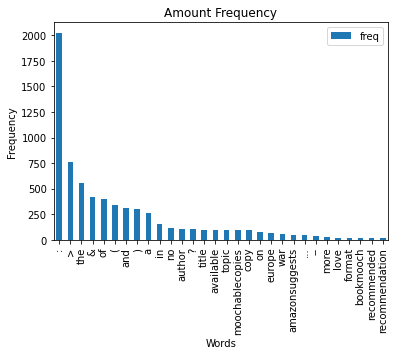

In [227]:
import matplotlib.pyplot as plt

def show_wordfreq(wordfreq, limit=30):

    data = wordfreq[:limit]
    # print(data)

    # df = pd.DataFrame({'c1':['apple','banana','banana'],'c2':['orange','apple','apple'],'c3':['banana','date','orange']})
    # df_stack = wordfreq.stack()
    # counter = df_stack.value_counts() # set top 10: df_stack.value_counts()[0:10]
    # plt.bar(counter.index, counter.values)

    # plt.hist(wordfreq)
    # plt.barh(wordfreq['freq'], width=2000, height=100)

    # fig = plt.figure(figsize=(20,5))
    # ax = fig.add_subplot(1,1,1)
    # # ax.set_xticks([0,5,10])
    # # ax.set_xticklabels([0,5,10])
    # # ax.set_yticks([0,1])
    # ax.set_yticklabels(wordfreq['word'])
    # wordfreq['freq'].hist(ax=ax,orientation='horizontal')
    # fig.tight_layout()  # Improves appearance a bit.

    # Plot the figure.
    # ax = plt.subplot(1,1,1)
    ax = data.plot(kind="bar")
    # ax.plot(wordfreq.plot(kind="bar"))
    ax.set_title("Amount Frequency")
    ax.set_xlabel("Words")
    ax.set_ylabel("Frequency")
    ax.set_xticklabels(data['word'])
    plt.show()
    pass


show_wordfreq(fwordfreq)


#### Provide examples of processed text (some parts)

Is everything all right with the result of cleaning these examples? What kind of information was lost?

# [10 points] Part 2. Duplicates detection. LSH

#### Libraries you can use

1. LSH - https://github.com/ekzhu/datasketch
1. LSH - https://github.com/mattilyra/LSH
1. Any other library on your choise

1. Detect duplicated text (duplicates do not imply a complete word-to-word match, but texts that may contain a paraphrase, rearrangement of words, sentences)
1. Make a plot dependency of duplicates on shingle size (with fixed minhash length) 
1. Make a plot dependency of duplicates on minhash length (with fixed shingle size)

In [220]:
# raise Exception('nope')
import datasketch
from datasketch import MinHash, MinHashLSH

# 1. Detect duplicated text
m1 = MinHash(num_perm=128)
for word in fldata:
    m1.update(word.encode('utf8'))
    continue

# Create LSH index
lsh = MinHashLSH(threshold=0.5, num_perm=128)
result = lsh.query(m1)
print("Approximate neighbours with Jaccard similarity > 0.5", result)

Approximate neighbours with Jaccard similarity > 0.5 []


In [ ]:
# 2. Make a plot dependency of duplicates on shingle size (with fixed minhash length) 


In [ ]:
# 3. Make a plot dependency of duplicates on minhash length


# [Optional 10 points] Part 3. Topic model

In this part you will learn how to do topic modeling with common tools and assess the resulting quality of the models. 

In [235]:
import pandas as pd

path3 = './storage/hw1/data.csv'

In [236]:
data3 = pd.read_csv(path3)

# for debug
data3 = data3.sample(1000)

data3

,id,text,author
5321,id16606,The story is that there's a whole legion of de...,HPL
5208,id19501,The wild eyes blazed with a too too glorious e...,EAP
11243,id19312,"We resided principally in the latter, and the ...",MWS
19183,id01039,"He wrote this in a very ancient hand, and when...",HPL
12846,id14532,Their number was past guessing.,HPL
...,...,...,...
11568,id07523,"""Your affectionate and afflicted father, ""Alph...",MWS
3506,id07133,"If we survive this coming summer, I will not s...",MWS
8352,id11358,This was precisely what had formed the subject...,EAP
16365,id21231,By the time that it wanted only three minutes ...,EAP


The provided data contain chunked stories by Edgar Allan Poe (EAP), Mary Shelley (MWS), and HP Lovecraft (HPL).

The dataset can be downloaded here: `https://drive.google.com/file/d/14tAjAzHr6UmFVFV7ABTyNHBh-dWHAaLH/view?usp=sharing`

#### Preprocess dataset with the functions from the Part 1

In [239]:
ldata3 = data3['text'].values.tolist()
ldata3[0][:200], ldata3[10][:200]

("The story is that there's a whole legion of devils seen sometimes on that reef sprawled about, or darting in and out of some kind of caves near the top.",
 'Neither did his old physician Dr. Davis, who died years ago.')

In [240]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import TreebankWordTokenizer, WhitespaceTokenizer
import re
# nltk.download('words')
# nltk.download('stopwords')
# nltk.download("wordnet")
# nltk.download('omw-1.4')

In [241]:
# 1. Remove html-tags
html_reg = """<("[^"]*"|'[^']*'|[^'">])*>"""
other_reg = ""

tldata = []
for item in ldata3:

    nitem = item
    nitem = re.sub(html_reg, "", nitem)
    nitem = re.sub("\t", "", nitem)
    nitem = re.sub("\r", "", nitem)
    nitem = re.sub("\n", "", nitem)
    nitem = re.sub("&nbsp;", "", nitem)

    tldata.append(nitem)
    
    continue

ldata3 = tldata
ldata3[1][:300]

'The wild eyes blazed with a too too glorious effulgence; the pale fingers became of the transparent waxen hue of the grave, and the blue veins upon the lofty forehead swelled and sank impetuously with the tides of the gentle emotion.'

In [242]:
## intermediate processing

# to low each character
tldata = []
for item in ldata3:
    tldata.append(item.lower())
    continue
ldata3 = tldata

# split string to words
tldata = []
for item in ldata3:
    # tldata.append(item.split(' '))
    # tmp = []
    tldata.append([i for i in nltk.word_tokenize(item)])

    continue
ldata3 = tldata

# delete empty items
tldata = []
for words in ldata3:
    tldata.append([word for word in words if word != ''])
    continue
ldata3 = tldata

ldata3[1][:30]

['the',
 'wild',
 'eyes',
 'blazed',
 'with',
 'a',
 'too',
 'too',
 'glorious',
 'effulgence',
 ';',
 'the',
 'pale',
 'fingers',
 'became',
 'of',
 'the',
 'transparent',
 'waxen',
 'hue',
 'of',
 'the',
 'grave',
 ',',
 'and',
 'the',
 'blue',
 'veins',
 'upon',
 'the']

In [243]:
# 2. Remove non-english words
eng_words = set(nltk.corpus.words.words())

tldata = []
print(len(ldata3[1]))
for words in ldata3:
    # tldata.append(" ".join(w for w in nltk.wordpunct_tokenize(item) if w.lower() in eng_words or not w.isalpha()))
    tldata.append(w for w in words if w.lower() in eng_words or not w.isalpha())
    continue

ldata3 = ldata3
len(ldata3[1])

44


44

In [244]:
# 3. Remove stop-words
tldata = []
for words in ldata:
    tmp = [word for word in words if word not in stopwords.words()]
    tldata.append(tmp)
    continue

len(words)

366

In [ ]:
# 4. Apply lemmatization / stemming
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

tldata = []
for words in ldata:
    tldata.append([lemmatizer.lemmatize(i) for i in words])
    # [stemmer.stem(i) for i in words]
    continue

ldata = tldata
ldata[1][100]

IndexError: list index out of range

#### Quality estimation

Implement the following three quality fuctions: `coherence` (or `tf-idf coherence`), `normalized PMI`, `based on the distributed word representation`(you can use pretrained w2v vectors or some other model). You are free to use any libraries (for instance gensim) and components.

In [246]:
from gensim import topic_coherence
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel



In [248]:
# def coherence(x, y, fs=1.0):
#     Pxy, Pxx, Pyy = 0, 0, 0
#     Cxy = abs(Pxy)**2/(Pxx*Pyy)
#     return Cxy

def coherence(topics):
    cm = CoherenceModel(topics=topics, corpus=common_corpus, dictionary=common_dictionary, coherence='u_mass')
    coherence = cm.get_coherence()  # get coherence value
    return coherence

# coherence(ldata[0])

In [ ]:
def normalizedPMI():
    return

In [ ]:
def representationDistr():
    return

SyntaxError: unexpected EOF while parsing (3674980287.py, line 1)

### Topic modeling

Read and preprocess the dataset, divide it into train and test parts `sklearn.model_selection.train_test_split`. Test part will be used in classification part. For simplicity we do not perform cross-validation here, but you should remember about it.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Plot the histogram of resulting tokens counts in the processed datasets.

Plot the histogram of resulting tokens counts in the processed datasets.

#### NMF

Implement topic modeling with NMF (you can use `sklearn.decomposition.NMF`) and print out resulting topics. Try to change hyperparameters to better fit the dataset.

In [249]:
from sklearn.decomposition import NMF

In [250]:
import numpy as np
X = np.array([[1, 1], [2, 1], [3, 1.2], [4, 1], [5, 0.8], [6, 1]])

model = NMF(n_components=2, init='random', random_state=0)
W = model.fit_transform(X)
H = model.components_

#### LDA

Implement topic modeling with LDA (you can use gensim implementation) and print out resulting topics. Try to change hyperparameters to better fit the dataset.

In [251]:
# https://radimrehurek.com/gensim/models/ldamodel.html
from gensim.models import ldamulticore
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary
from gensim.test.utils import datapath

In [ ]:
# Create a corpus from a list of texts
common_dictionary = Dictionary(common_texts)
common_corpus = [common_dictionary.doc2bow(text) for text in common_texts]

# Train the model on the corpus.
lda = LdaModel(common_corpus, num_topics=10)

### Additive regularization of topic models 

Implement topic modeling with ARTM. You may use bigartm library (simple installation for linux: pip install bigartm) or TopicNet framework (`https://github.com/machine-intelligence-laboratory/TopicNet`)

Create artm topic model fit it to the data. Try to change hyperparameters (number of specific and background topics) to better fit the dataset. Play with smoothing and sparsing coefficients (use grid), try to add decorrelator. Print out resulting topics.

Write a function to convert new documents to topics probabilities vectors.

Calculate the quality scores for each model. Make a barplot to compare the quality.